[[0, 0, 0.17292236702321245], [0, 57, 0.22936882217512164], [0, 66, 0.20373449474167227], [0, 71, 0.1964949291670844], [0, 75, 0.054502557413660294], [19, 0, 0.07500717255657448], [24, 0, 0.04830475770555008], [25, 67, 0.19155902923487547], [29, 67, 0.14398508932334994], [32, 69, 0.22749577894058823], [36, 76, 0.191320062035357], [39, 66, 0.33824333859639427], [40, 88, 0.16610842775390094], [42, 0, 0.14932336658914627], [43, 65, 0.45516938672004326], [45, 33, 0.12402552611721931], [45, 55, 0.6633006896670172], [54, 52, 0.8555829002862265], [55, 19, 0.07866322537516278], [63, 71, 0.476453329768729], [64, 98, 0.06102339885215424], [93, 33, 0.9715115780217102], [95, 100, 0.27874607715012106]]


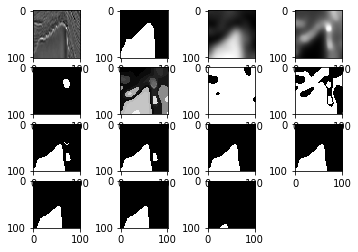

In [11]:
# %%

import cv2

import covariance
import edge
import gl
import imagehelper
import smootheness
import floodfill

image_pairs = imagehelper.get_image_pairs()

if __name__ == "__main__":
    image='./data/original/26.png'
    
    I = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2GRAY)
    R = cv2.cvtColor(cv2.imread('./data/result/26.png'), cv2.COLOR_BGR2GRAY)
        # glcm
        # non_salt_patches, salt_patches = glcm.treat_glcm(image, result)
        # covariance
    covariance_result = covariance.treat_covariance_with_multiple_window_normalized(image)
        # edge_result
    edge_result = edge.treat_edge_with_multiple_window(image)
    glcm=gl.treat_glcm_with_multiple_window_normalized(image,10,'homogeneity')
        # GL
        # gl_result = gl.treat_glcm_with_multiple_window_normalized(image)
        # # smootheness
        # smootheness_result = smootheness.treat_smoothness_normalized(image)
        # imagehelper.show_in_plot([
        #     I, R,
        #     covariance_result, edge_result, smootheness_result, gl_result
        # ])

    graph = floodfill.convert_edge_to_normal(edge_result)
    floodfill_result, colored_results = floodfill.flood_fill(edge_result, glcm)
    colored_results = 1 - colored_results
    imagehelper.show_in_plot([
        I,
        glcm, edge_result, graph, floodfill_result,
    ] +  colored_results + [R])
        #
        # for covariance_w in np.linspace(0, 1.0, num=5):
        #     for edge_w in np.linspace(0, 1.0, num = 5):
        #         for smootheness_w in np.linspace(0, 1, num = 5):
        #             for covariance_p in np.linspace(1, 2.0, num=5):
        #                 for edge_p in np.linspace(1, 2.0, num=5):
        #                     for smootheness_p in np.linspace(1, 2, num=5):
        #
        #                         final_result = np.power(covariance_result, covariance_p) * covariance_w + np.power(edge_result, edge_p) * edge_w + np.power(smootheness_result, smootheness_p) * smootheness_w
        #
        #                         final_result = final_result / np.max(final_result)
        #                         imagehelper.show_in_plot([
        #                             I, R,
        #                             covariance_result, edge_result, smootheness_result,
        #                             final_result
        #                         ])
        #
        #
